In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

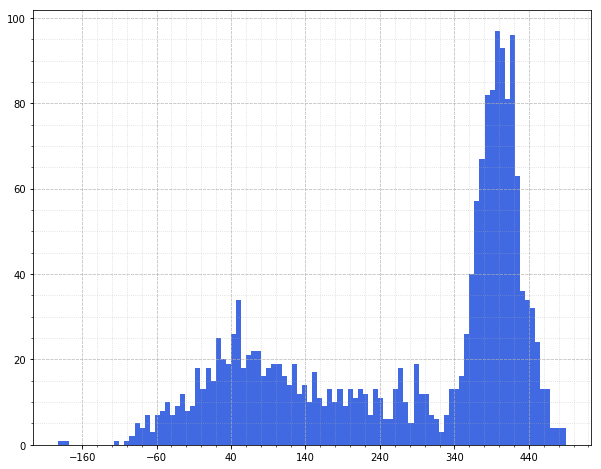

In [55]:
r1 = np.random.normal(400, 30, 1000)
r2 = np.random.normal(20, 60, 300)
r3 = np.random.uniform(20, 320, 500)
rnd = np.append(np.append(r1, r2), r3)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1,1,1)

ax.hist(rnd, bins=100, color='royalblue')

# Major ticks every 20, minor ticks every 5
x_major_ticks = np.arange(-160, 540, 100)
x_minor_ticks = np.arange(-160, 540, 20)
y_major_ticks = np.arange(0, 101, 20)
y_minor_ticks = np.arange(0, 101, 5)

ax.set_xticks(x_major_ticks)
ax.set_xticks(x_minor_ticks, minor=True)
ax.set_yticks(y_major_ticks)
ax.set_yticks(y_minor_ticks, minor=True)

# And a corresponding grid
ax.grid(which='both')

# # Or if you want different settings for the grids:
ax.grid(which='major', alpha=0.7, linestyle='--')
ax.grid(which='minor', alpha=0.5, linestyle=':')


In [41]:
def get_one_dt(distro, datasize):
#     return np.ones(size)
    if distro == 'gau_1':
        return np.random.normal(2, 18, datasize)
    elif distro == 'gau_2':
        return np.random.normal(0, 0.001, datasize)
    
def get_q_true(distro, tau_lst):
    if tau_lst == tau_vals:
        if distro=='gau_1':
            return np.asarray([-21.06792817980280840537, 
                              -7.43920922874473411269,
                              2,
                              25.06792817980280840537,
                              43.87426173273513981594])
        elif distro=='gau_2':
            return np.asarray([-0.001281551565544600466965,
                              -5.244005127080407840383E-4,
                              0,
                              0.001281551565544600466965,
                              0.002326347874040841100886])
        elif distro=='mix':
            # sampled from 100000000 datapoints
            return np.asarray([-80.28496182,
                               -29.02324254,
                               -0.36011575,
                               36.69268923,
                               120.7676231])
        elif distro=='exp':
            return np.asarray([0.1053605156578263012275,
                              0.3566749439387323789126,
                              0.6931471805599453094172,
                              2.302585092994045684018,
                              4.605170185988091368036])*6.5 - 20
    raise Exception('tau_lst should be tau_vals')
    
    
def get_procs(dataset, step_size, tau_lst):
    if len(dataset.shape)!= 1: 
        raise Exception('Dataset for get_procs() of wrong shape:' + str(dataset.shape)+ ', should be 1d array')
        
    procs = np.zeros((len(tau_lst), dataset.shape[0]))
    for idx, tau in enumerate(tau_lst):
        q = 0
        q_sgd_proc = procs[idx]
        # change stepsize
        if step_size != 'frugal':
            for k, x in enumerate(dataset):
#                 if idx==1: print (k, ':', q)
                alpha = set_stepsize(k+1, step_size)
                if x > q:
                    q = q + alpha*tau
                else:
                    q = q - alpha*(1-tau)
                q_sgd_proc[k] = q
        
        # frugal
        else:
            rdn_lst = np.random.uniform(0,1, dataset.shape[0])
            for k, x in enumerate(dataset):
                rdn = rdn_lst[k]
                if x > q and rdn > 1-tau:
                    q += 2
                elif x < q and rdn > tau:
                    q -= 2
                q_sgd_proc[k] = q
    return procs

In [95]:
tau_vals = [0.1, 0.3, 0.5, 0.9, 0.99]
# sample_size = 
sample = get_one_dt('gau_1', 2000)
q_true = get_q_true('gau_1', tau_vals)
procs = get_procs(sample, 'frugal', tau_vals).T
print (procs.shape)

(2000, 5)


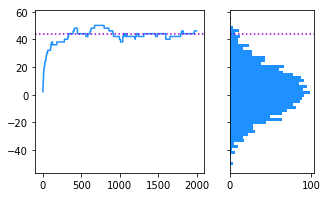

In [102]:
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(5,3), gridspec_kw={'width_ratios': [2, 1]})

ax1.plot(procs[:, 4], color='dodgerblue')
# ax1.hlines(y = q_true[1],xmin = 0, xmax = 100, colors = 'royalblue', linestyles='dotted')
ax1.axhline(q_true[4], color='darkviolet', ls = ':')

ax2.hist(sample, bins=50, orientation="horizontal", color='dodgerblue');
# ax2.hlines(y = q_true[1], xmin = 0, xmax = 1000, colors = ['royalblue']*5, linestyles='dotted')
ax2.axhline(q_true[4], color='darkviolet', ls = ':')
ax2.plot()
plt.show()

fig.savefig('foo.png')


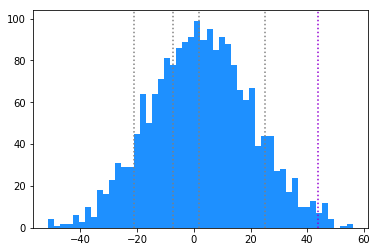

In [103]:
fig, ax = plt.subplots()
ax.hist(sample, bins=50, color='dodgerblue');
ax.axvline(q_true[0], color='grey', ls = ':')
ax.axvline(q_true[1], color='grey', ls = ':')
ax.axvline(q_true[2], color='grey', ls = ':')
ax.axvline(q_true[3], color='grey', ls = ':')
ax.axvline(q_true[4], color='darkviolet', ls = ':')
plt.show()
fig.savefig('foo1.png')